In [6]:
import sys
import numpy as np
import pandas as pd
data = pd.read_table('dane2.dat', sep=' ')
classes = set(data.klasa)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Zadanie 5
Dokonaj grupowania danych pomijając atrybut decyzyjny. Wykonaj grupowanie dla różnych liczb grup, znajdź optymalną liczbę grup (przyjmując sensowne kryterium). Czy w procesie grupowania konieczne jest wykorzystanie wszystkich atrybutów, czy wystarczy wybrać ich podzbiór ? Czy otrzymany podział jest zgodny z podziałem na klasy uwidocznionym w atrybucie decyzyjnym ? Oceń to wizualnie (czy jest zgodny z wnioskami otrzymanymi w punkcie 2) oraz sprawdź numerycznie obliczając stosowne miary.

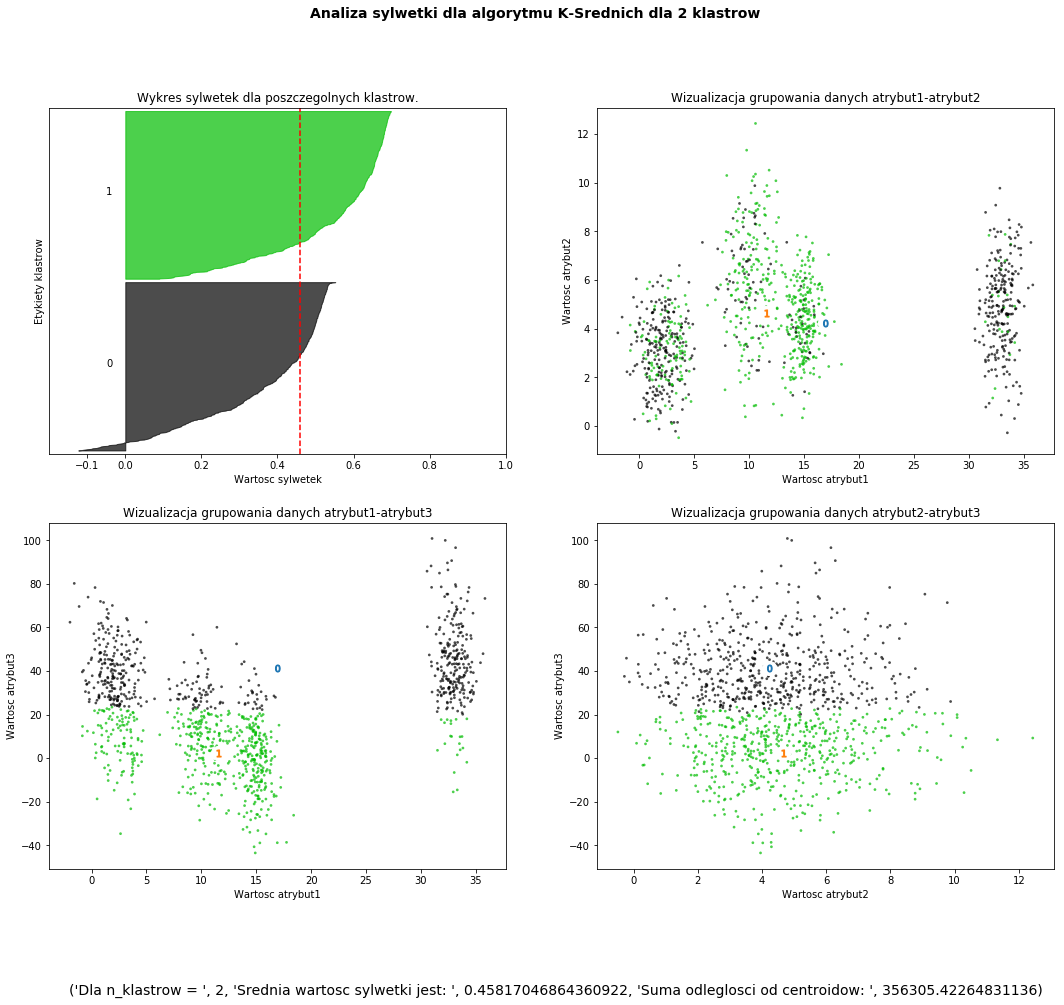

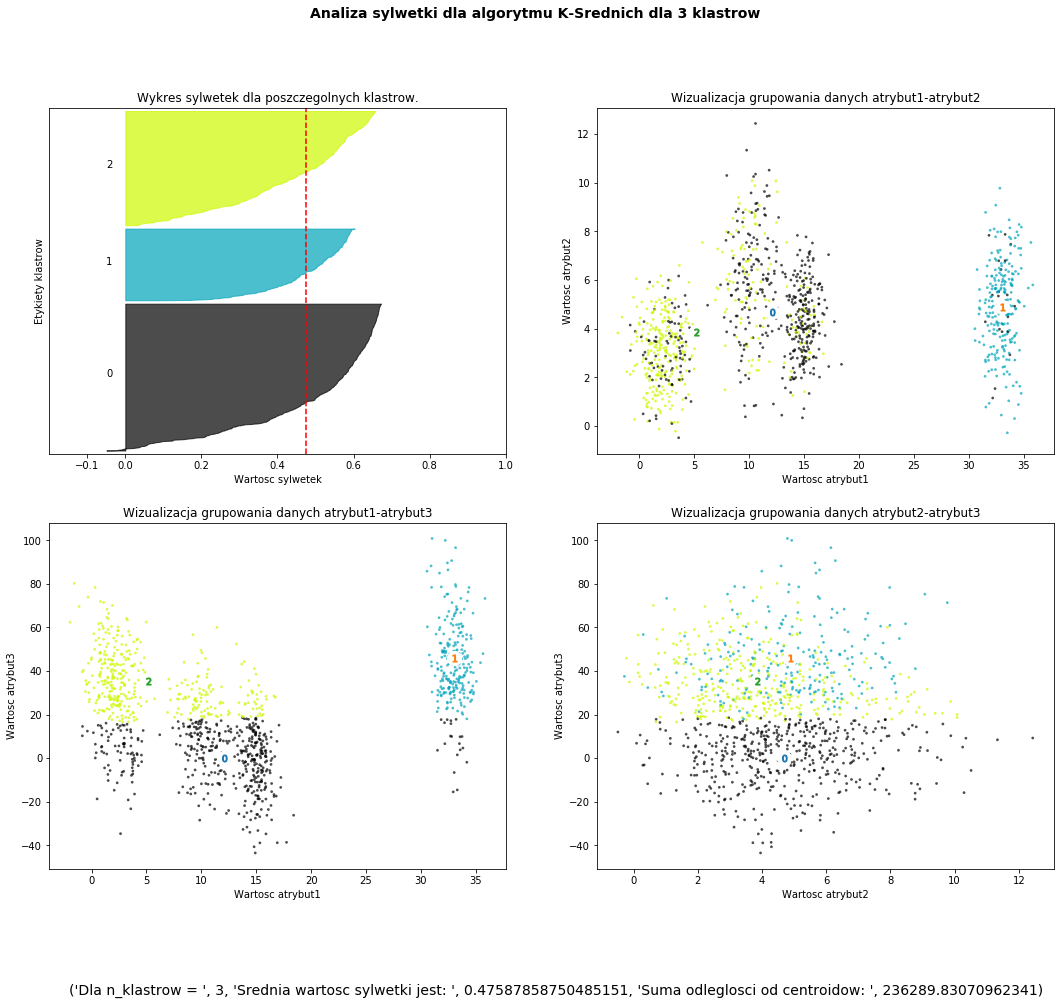

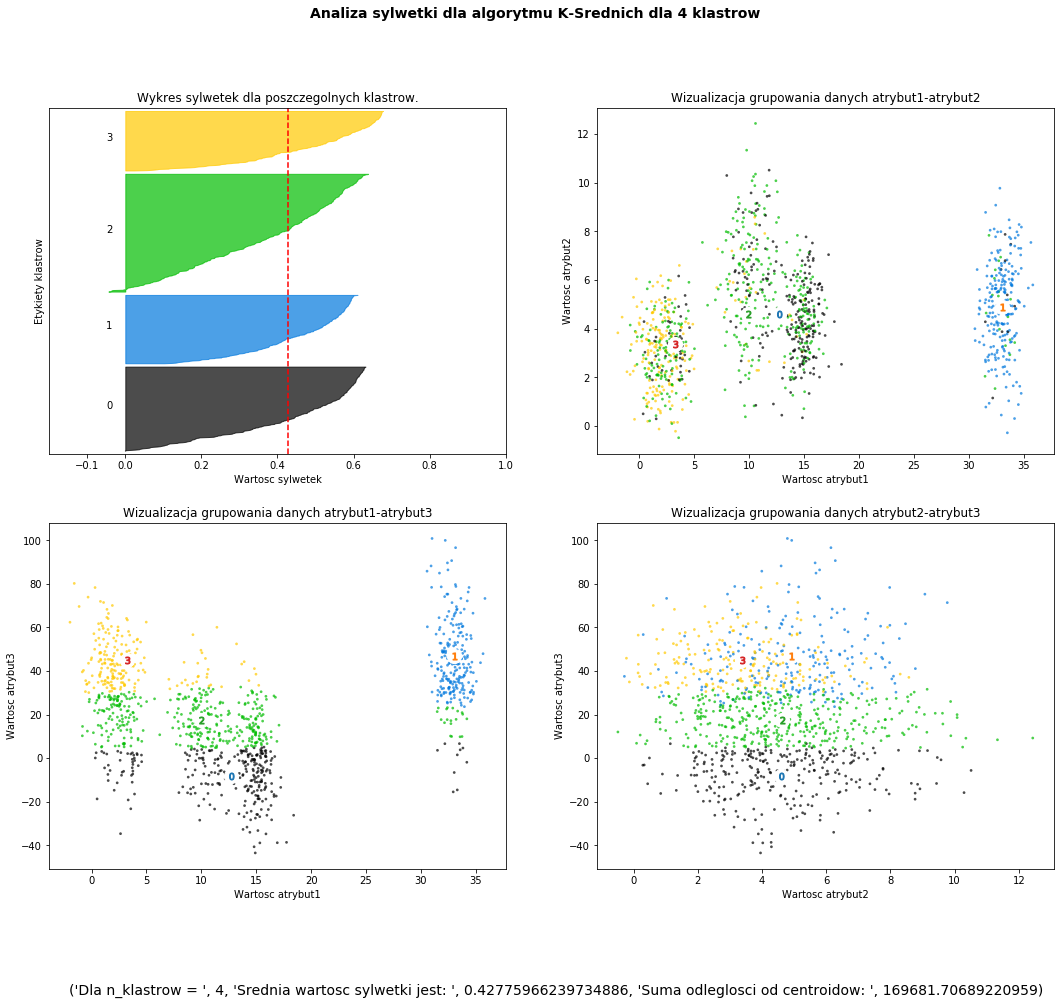

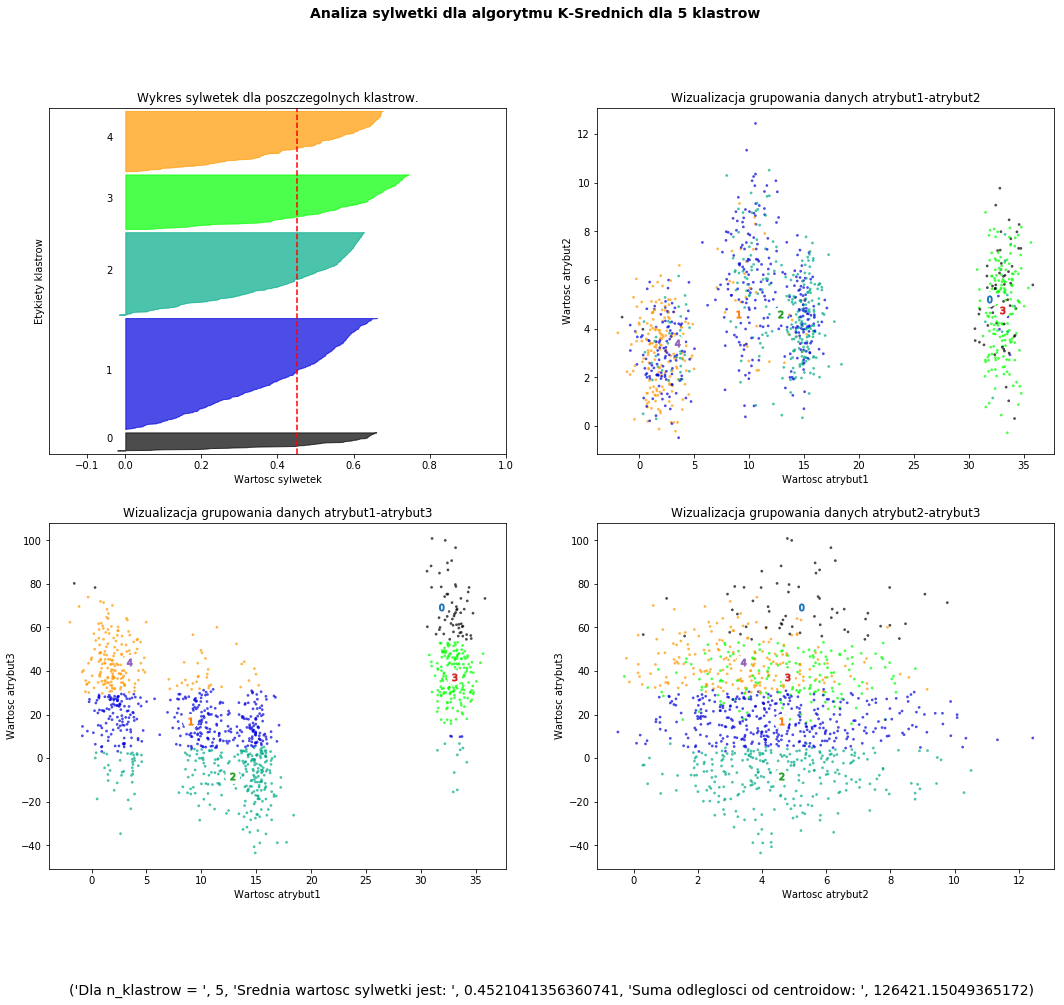

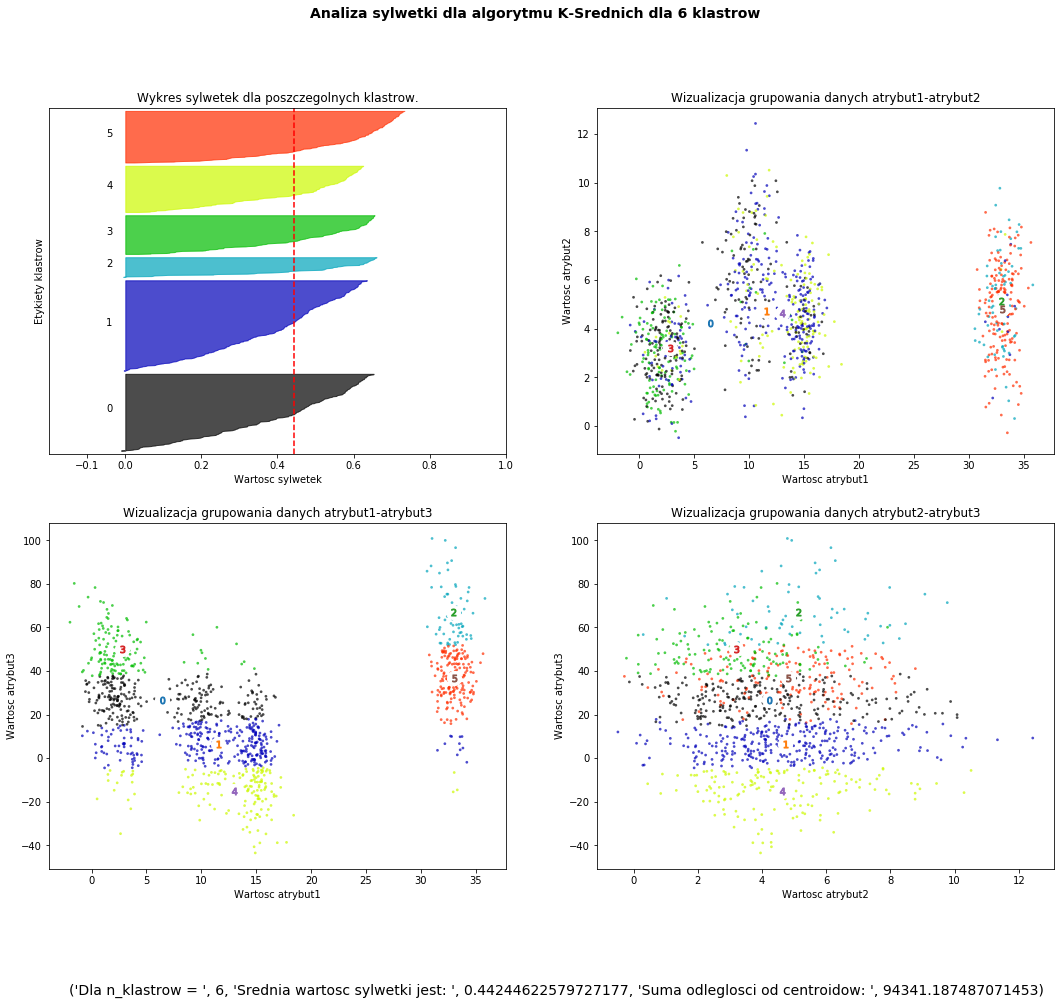

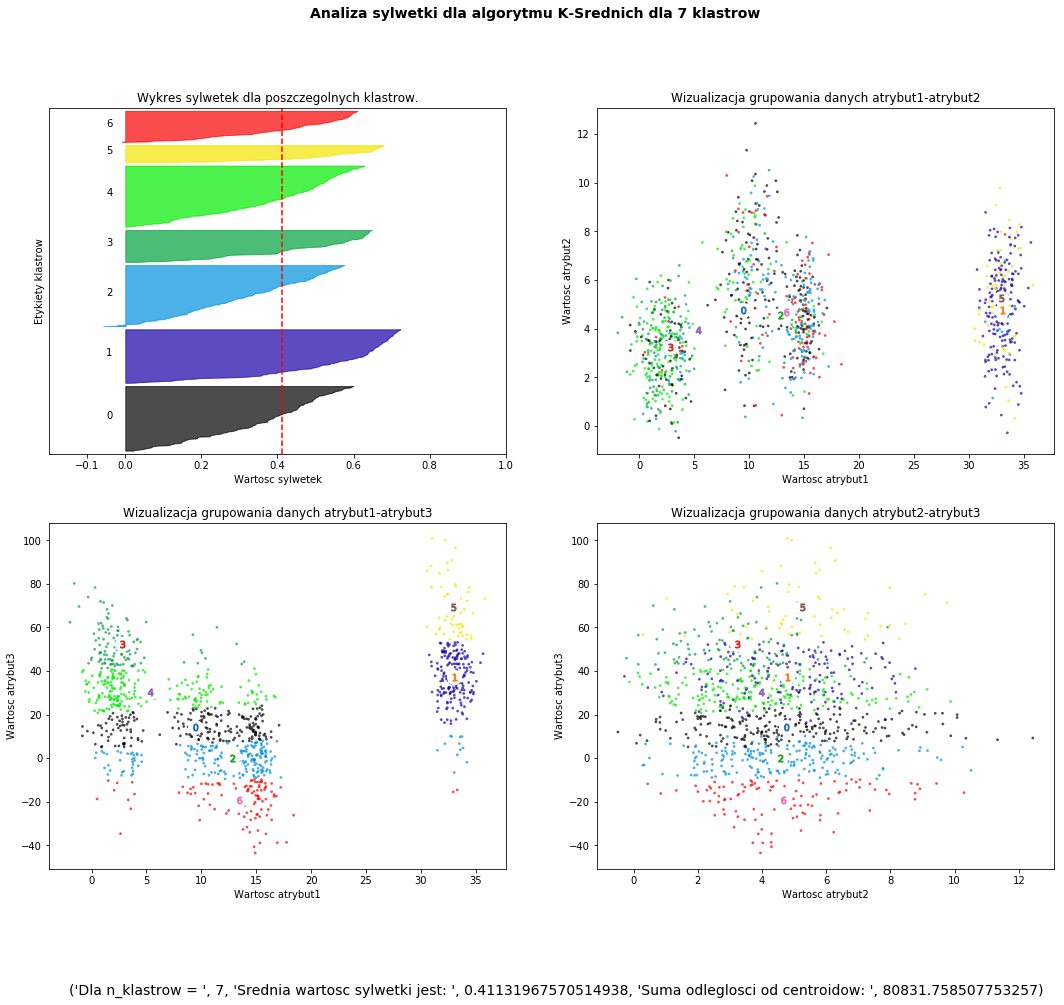

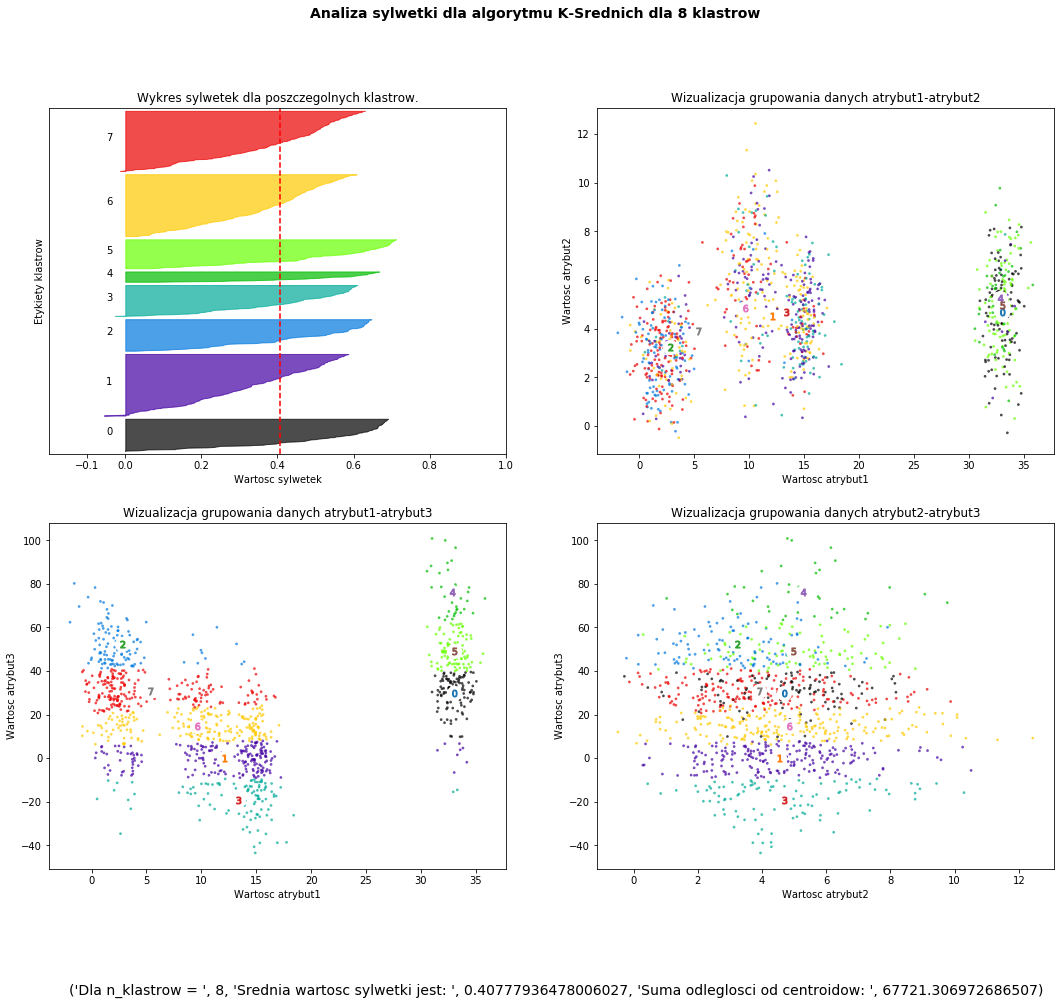

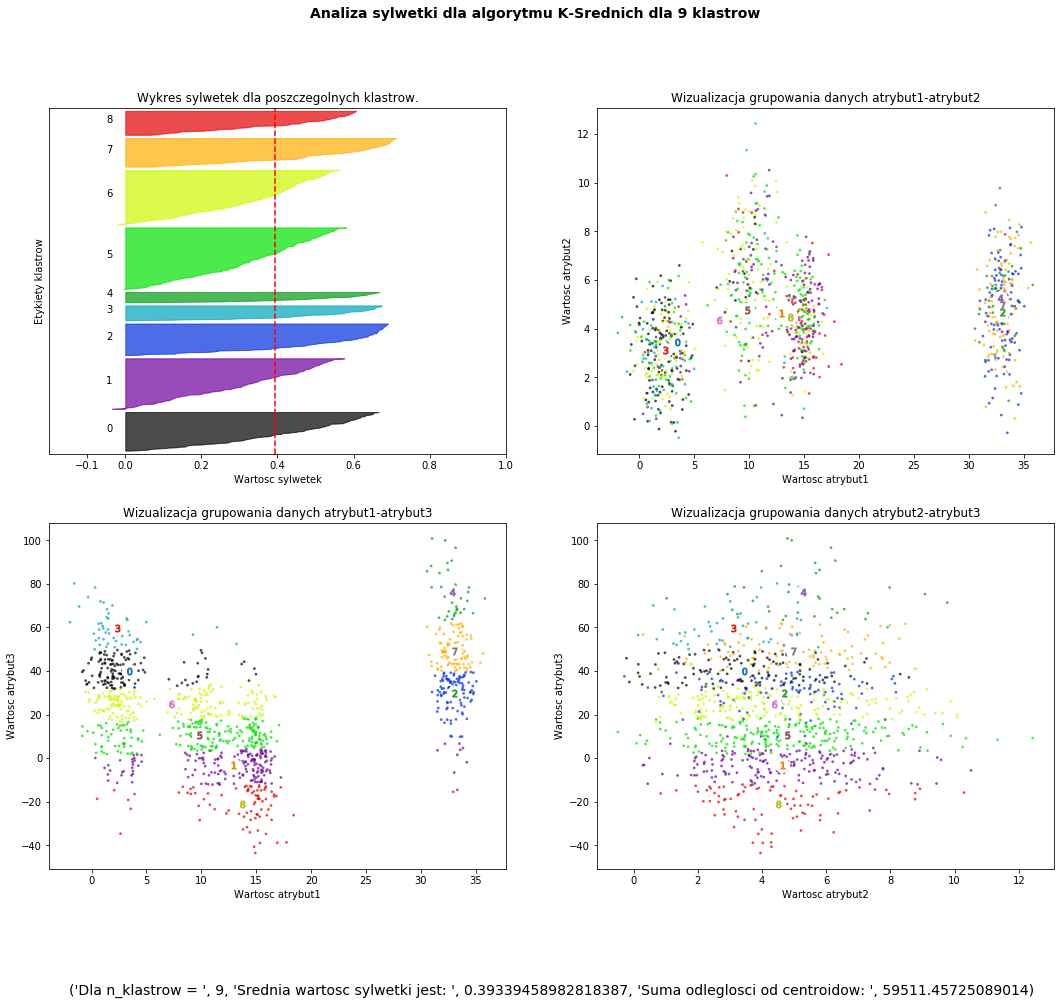

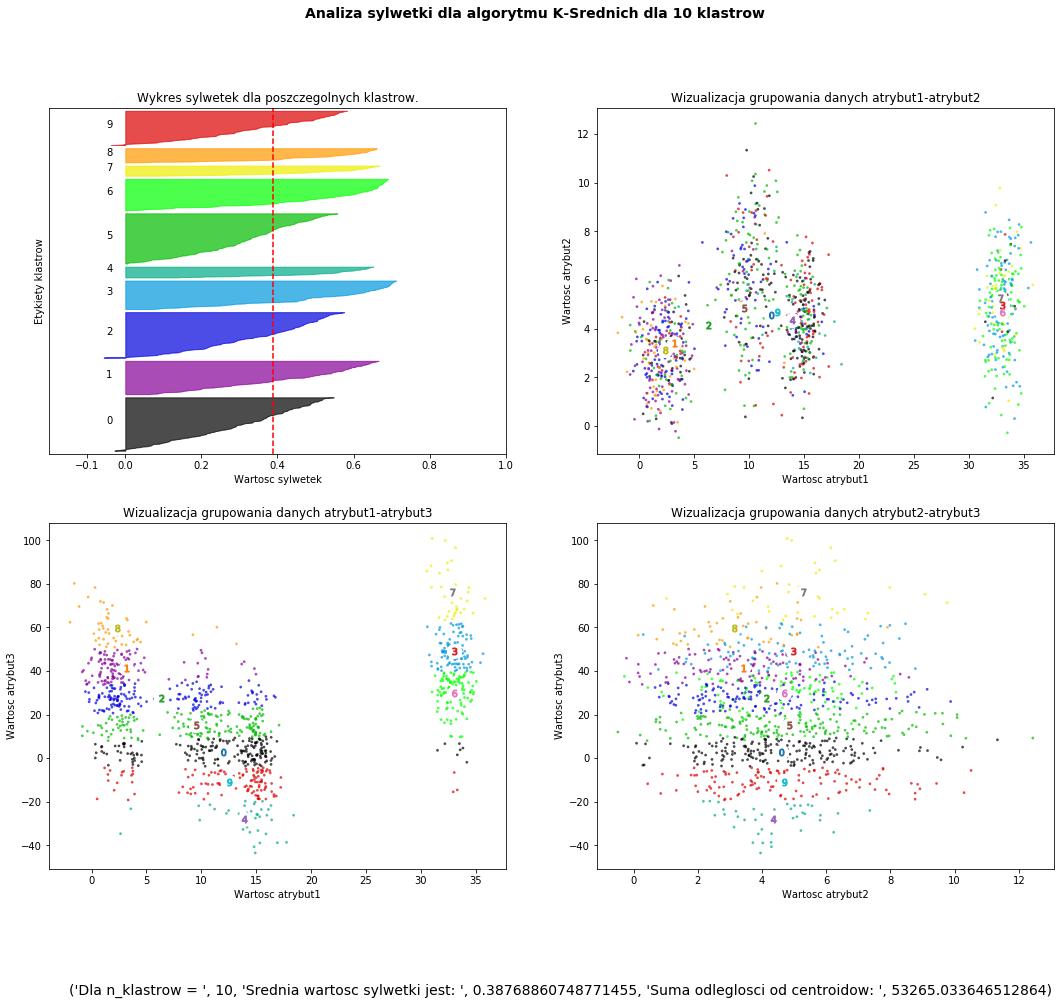

Text(0,0.5,'Suma odleglosci od centroidow')

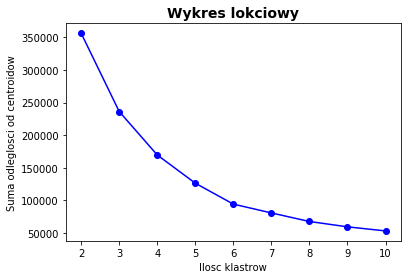

In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

score = pd.Series()

for n_cluster in range_n_clusters:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    fig.set_size_inches(18, 14)
    
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(data2) + (n_cluster + 1) * 10])
    
    kmeans = KMeans(n_clusters=n_cluster, random_state=0).fit(data2)
    score = score.append(pd.Series(kmeans.inertia_))
    cluster_labels = kmeans.fit_predict(data2)
    
    silhouette_avg = silhouette_score(data2, cluster_labels)

    sample_silhouette_values = silhouette_samples(data2, cluster_labels)
    
    y_lower = 10
    for i in range(n_cluster):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
        
    ax1.set_title("Wykres sylwetek dla poszczegolnych klastrow.")
    ax1.set_xlabel("Wartosc sylwetek")
    ax1.set_ylabel("Etykiety klastrow")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.spectral(cluster_labels.astype(float) / n_cluster)
    
    ax2.scatter(data2.atrybut1, data2.atrybut2, marker='.', s=30, lw=0, alpha=0.7, c=colors)
    ax2.set_title("Wizualizacja grupowania danych atrybut1-atrybut2")
    ax2.set_xlabel("Wartosc atrybut1")
    ax2.set_ylabel("Wartosc atrybut2")
    
    ax3.scatter(data2.atrybut1, data2.atrybut3, marker='.', s=30, lw=0, alpha=0.7, c=colors)
    ax3.set_title("Wizualizacja grupowania danych atrybut1-atrybut3")
    ax3.set_xlabel("Wartosc atrybut1")
    ax3.set_ylabel("Wartosc atrybut3")
    
    ax4.scatter(data2.atrybut2, data2.atrybut3, marker='.', s=30, lw=0, alpha=0.7, c=colors)
    ax4.set_title("Wizualizacja grupowania danych atrybut2-atrybut3")
    ax4.set_xlabel("Wartosc atrybut2")
    ax4.set_ylabel("Wartosc atrybut3")
    
    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200)
    ax3.scatter(centers[:, 0], centers[:, 2], marker='o', c="white", alpha=1, s=200)
    ax4.scatter(centers[:, 1], centers[:, 2], marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
    for i, c in enumerate(centers):
        ax3.scatter(c[0], c[2], marker='$%d$' % i, alpha=1, s=50)
    for i, c in enumerate(centers):
        ax4.scatter(c[1], c[2], marker='$%d$' % i, alpha=1, s=50)

    plt.suptitle(("Analiza sylwetki dla algorytmu K-Srednich dla %d klastrow" % n_cluster), fontsize=14, fontweight='bold')
    plt.figtext(0.14, 0,("Dla n_klastrow = ", n_cluster, "Srednia wartosc sylwetki jest: ", silhouette_avg, 
                         "Suma odleglosci od centroidow: ", kmeans.inertia_), fontsize=14)
    plt.show()
    

plt.plot(range_n_clusters, score,'bo-')
plt.title("Wykres lokciowy", fontsize=14, fontweight='bold')
plt.xlabel("Ilosc klastrow")
plt.ylabel("Suma odleglosci od centroidow")

Na podstawie powyższych wykresów widać, że optymalną liczbą klas jest liczba 4. 

Aby stwierdzić, czy do grupowania potrzebne są wszystkie atrybuty, można posłużyć się korelacją. Jeżeli jest bliska 1, to wtedy jeden z atrybutów, dla których wartość korelacji wyznaczamy można odrzucić.

Otrzymany podział jest zgodny z podziałem na klasy uwidocznionym w atrybucie decyzyjnym. 